# Table of Content

1. Importing libraries and datasets
2. Regional Analysis
3. Customer Analysis Preparation - Creating customer profiles based on age, family status and income
4. Customer Analysis - Loyalty Types
5. Customer Analysis - Regions¶
6. Customer Analysis - Age & Family Status¶
7. Customer Analysis - Income
8. Product Analysis
9. Other Analysis - Frequencies

# Importing libraries and datasets

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Define path
path = r'/Users/frederikeschulz-mullensiefen/Desktop/Master Folder_Instacart'

In [4]:
# Import dataframe
df_ordprodcust = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [5]:
df_ordprodcust.shape

(32404859, 29)

# Regional analysis

In [4]:
# Creating region flag for Northeast
df_ordprodcust.loc[df_ordprodcust['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'

In [5]:
# Creating region flag for Midwest
df_ordprodcust.loc[df_ordprodcust['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest' 

In [6]:
# Creating region flag for South
df_ordprodcust.loc[df_ordprodcust['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'

In [7]:
# Creating region flag for West
df_ordprodcust.loc[df_ordprodcust['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'

In [8]:
# Counting frequency of regions
df_ordprodcust['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [9]:
# Creating frequency table of spender types and regions
freq_table = pd.crosstab(df_ordprodcust['region'], df_ordprodcust['spending_flag']) 

In [10]:
# Show frequency table
freq_table

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


In [148]:
freq_table.to_clipboard()

# Customer Analysis Preparation - Creating customer profiles based on age, family status and income

In [11]:
# Creating an exclusion flag for customers with less than 5 orders
df_ordprodcust.loc[df_ordprodcust['max_order'] < 5, 'exclusion_flag'] = 'exclusion'

In [12]:
# Creating an inclusion flag for customers with equal to or more than 5 orders
df_ordprodcust.loc[df_ordprodcust['max_order'] >= 5, 'exclusion_flag'] = 'inclusion'

In [13]:
# Checking frequency of exclusion and inclusion
df_ordprodcust['exclusion_flag'].value_counts()

exclusion_flag
inclusion    30964564
exclusion     1440295
Name: count, dtype: int64

In [14]:
# Creating subset without data that have exclusion flag
df_ordprodcust_exclusion = df_ordprodcust[df_ordprodcust['exclusion_flag']=='inclusion']

In [15]:
# Check if rows of subset match frequency 
df_ordprodcust_exclusion.shape

(30964564, 31)

In [16]:
# Creating customer age group: teenager
df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['age'] < 20, 'age_group'] = 'teenager'

/var/folders/6r/_pj4fghj6jx_vml8b8yvngzh0000gn/T/ipykernel_9938/2211845956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['age'] < 20, 'age_group'] = 'teenager'


In [17]:
# Creating customer age group: young adult
df_ordprodcust_exclusion.loc[(df_ordprodcust_exclusion['age'] >= 20) & (df_ordprodcust_exclusion['age'] <= 39), 'age_group'] = 'young adult'

In [18]:
# Creating customer age group: middle age adult
df_ordprodcust_exclusion.loc[(df_ordprodcust_exclusion['age'] >= 40) & (df_ordprodcust_exclusion['age'] <= 59), 'age_group'] = 'middle age adult'

In [19]:
# Creating customer age group: senior adult
df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['age'] >= 60, 'age_group'] = 'senior adult'

In [20]:
df_ordprodcust_exclusion['age_group'].value_counts()

age_group
senior adult        10574504
middle age adult     9724950
young adult          9690576
teenager              974534
Name: count, dtype: int64

In [21]:
# Creating income group: low income
df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['income'] <= 30000, 'income_group'] = 'low income'

/var/folders/6r/_pj4fghj6jx_vml8b8yvngzh0000gn/T/ipykernel_9938/2764802633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['income'] <= 30000, 'income_group'] = 'low income'


In [22]:
# Creating income group: lower-middle
df_ordprodcust_exclusion.loc[(df_ordprodcust_exclusion['income'] > 30000) & (df_ordprodcust_exclusion['income'] <= 58020), 'income_group'] = 'lower-middle income'

In [23]:
# Creating income group: middle
df_ordprodcust_exclusion.loc[(df_ordprodcust_exclusion['income'] > 58020) & (df_ordprodcust_exclusion['income'] <= 94000), 'income_group'] = 'middle income'

In [24]:
# Creating income group: upper-middle
df_ordprodcust_exclusion.loc[(df_ordprodcust_exclusion['income'] > 94000) & (df_ordprodcust_exclusion['income'] <= 153000), 'income_group'] = 'upper-middle income'

In [25]:
# Creating income group: upper 
df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['income'] > 153000, 'income_group'] = 'upper income'

In [26]:
#Count frequency of income groups
df_ordprodcust_exclusion['income_group'].value_counts()

income_group
upper-middle income    13206444
middle income           9109710
lower-middle income     5092881
upper income            3361397
low income               194132
Name: count, dtype: int64

In [27]:
# Creating children_flag
df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['n_dependants'] > 0, 'children_flag'] = 'children'
df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['n_dependants'] == 0, 'children_flag'] = 'childless'

/var/folders/6r/_pj4fghj6jx_vml8b8yvngzh0000gn/T/ipykernel_9938/3711039244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordprodcust_exclusion.loc[df_ordprodcust_exclusion['n_dependants'] > 0, 'children_flag'] = 'children'


In [132]:
# Exporting subset dataframe
df_ordprodcust_exclusion.to_pickle(os.path.join(path,'02_Data','Prepared Data', 'ords_prods_cust_exluded_data.pkl'))

# Customer Analysis - Loyalty Types

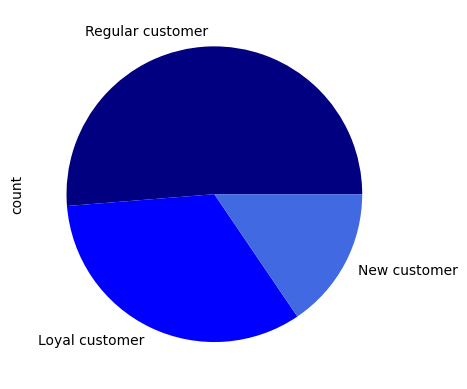

In [42]:
# Creating pie chart for proportion of customer loyalty groups
colors = ['navy','blue','royalblue']
pie_loyalty = df_ordprodcust_exclusion['loyalty_flag'].value_counts().plot.pie(colors = colors)

In [43]:
# Export created pie chart
pie_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'loyalty_pie.png'),bbox_inches='tight')

In [45]:
#Count frequency of loyalty groups
df_ordprodcust_exclusion['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

In [29]:
# Export created bar chart
customer_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'cloyalty.png'),bbox_inches='tight')

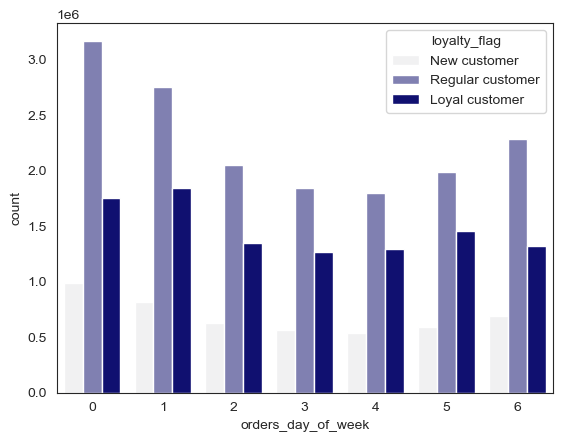

In [55]:
# Create bar chart for loyalty groups and order counts per day of week
loyalty_dow=sns.countplot(x='orders_day_of_week', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [48]:
# Export created bar chart
loyalty_dow.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'loyalty_dow.png'),bbox_inches='tight')

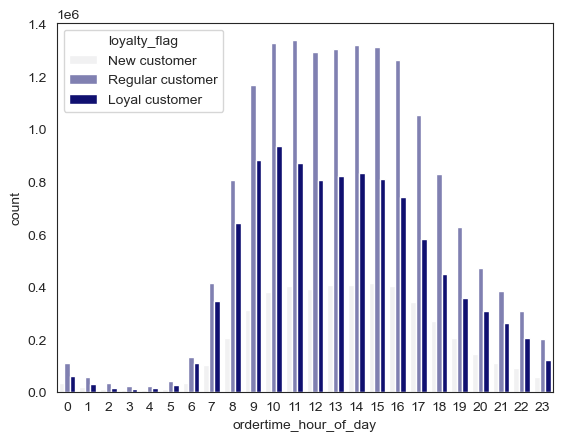

In [49]:
# Create bar chart for loyalty groups and order counts per hod

loyalty_hod=sns.countplot(x='ordertime_hour_of_day', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [56]:
# Export created bar chart
loyalty_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'loyalty_hod.png'),bbox_inches='tight')

In [47]:
# Grouping dataframe by customer types and aggregating data with mean, median, min, max of income 
df_ordprodcust_exclusion.groupby('loyalty_flag').agg({'income': ['mean', 'median', 'min', 'max']})

income                        
                           mean   median    min     max
loyalty_flag                                           
Loyal customer    100354.615594  96940.0  25955  593901
New customer       97419.249228  95743.0  25903  590790
Regular customer   99918.972480  96943.0  25972  592409

In [142]:
# Export created pie chart
scatt_orderprice.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatt_orderprice.png'),bbox_inches='tight')

# Customer Analysis - Regions

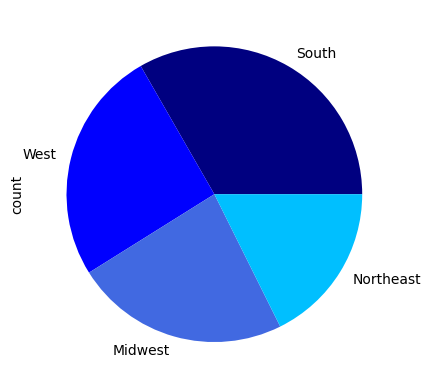

In [50]:
# Create pie chart for regions
colors = ['navy','blue','royalblue','deepskyblue']
pie_region = df_ordprodcust_exclusion['region'].value_counts().plot.pie(colors = colors)

In [51]:
# Export created pie chart
pie_region.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'region_pie.png'),bbox_inches='tight')

In [52]:
#Count frequency of regions
df_ordprodcust_exclusion['region'].value_counts()

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

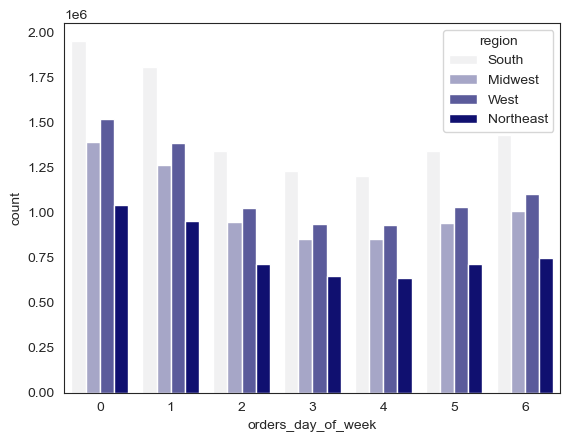

In [69]:
# Create bar chart for regions and order counts per day of week
region_dow=sns.countplot(x='orders_day_of_week', hue='region', data=df_ordprodcust_exclusion, color = 'navy') 

In [70]:
# Export created bar chart
region_dow.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'region_dow.png'),bbox_inches='tight')

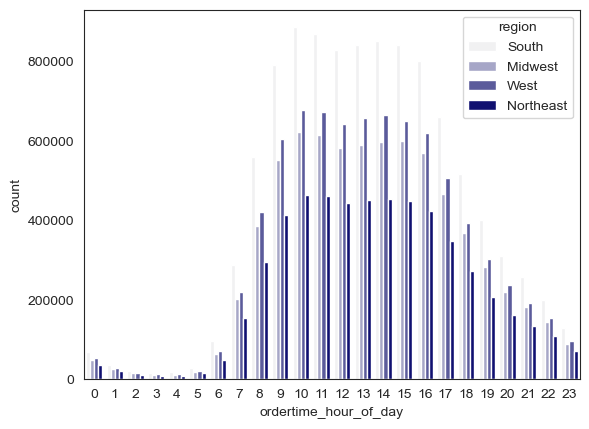

In [71]:
# Create bar chart for regions and order counts per hod
region_hod=sns.countplot(x='ordertime_hour_of_day', hue='region', data=df_ordprodcust_exclusion, color = 'navy') 

In [76]:
# Export created bar chart
region_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'region_hod.png'),bbox_inches='tight')

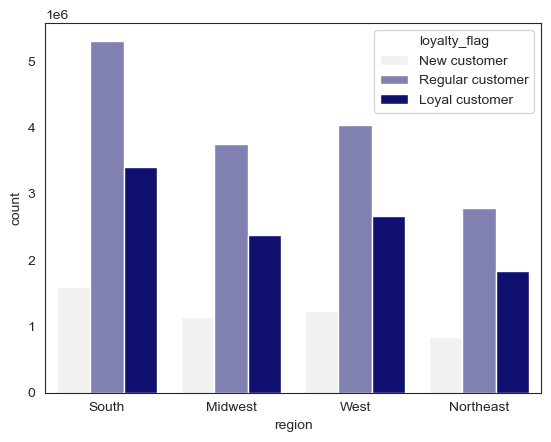

In [111]:
# Create bar chart for regions and loyalty groups
region_loy=sns.countplot(x='region', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [102]:
# Export created bar chart
region_loy.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'region_loy.png'),bbox_inches='tight')

# Customer Analysis - Age & Family Status

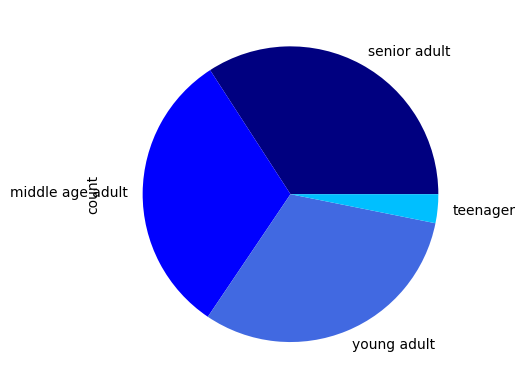

In [54]:
# Create pie chart age groups
colors = ['navy','blue','royalblue','deepskyblue']
pie_age = df_ordprodcust_exclusion['age_group'].value_counts().plot.pie(colors = colors)

In [55]:
# Export created pie chart
pie_age.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_pie.png'),bbox_inches='tight')

In [56]:
#Count frequency of age groups
df_ordprodcust_exclusion['age_group'].value_counts()

age_group
senior adult        10574504
middle age adult     9724950
young adult          9690576
teenager              974534
Name: count, dtype: int64

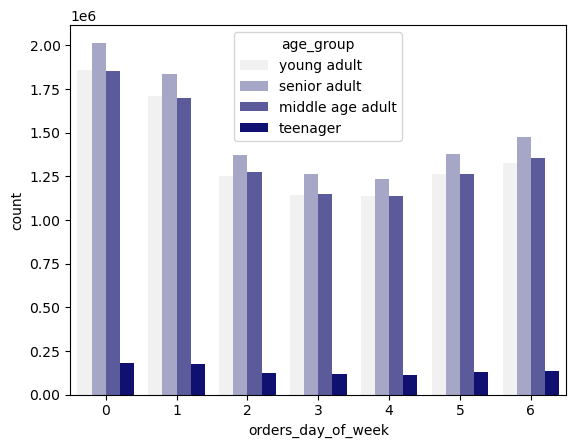

In [57]:
# Create bar chart for age groups and order counts per day of week
age_dow=sns.countplot(x='orders_day_of_week', hue='age_group', data=df_ordprodcust_exclusion, color = 'navy') 

In [58]:
# Export created  chart
age_dow.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_dow.png'),bbox_inches='tight')

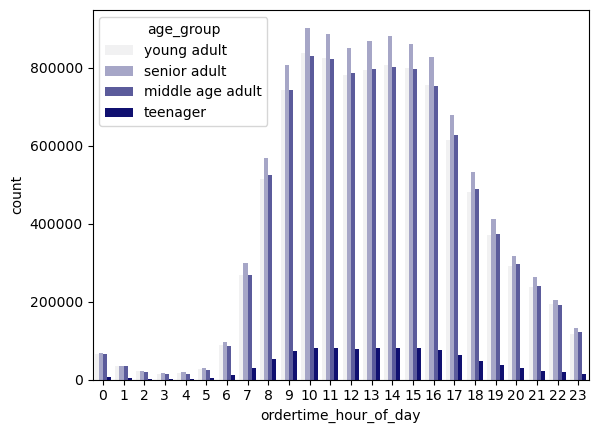

In [59]:
# Create bar chart for age groups and order counts per hod
age_hod=sns.countplot(x='ordertime_hour_of_day', hue='age_group', data=df_ordprodcust_exclusion, color = 'navy') 

In [60]:
# Export created chart
age_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_hod.png'),bbox_inches='tight')

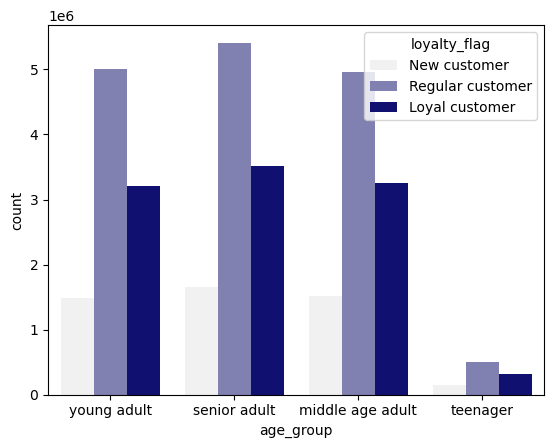

In [61]:
# Create bar chart for age and loyalty groups 
age_loyalty=sns.countplot(x='age_group', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [62]:
# Export created chart
age_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'age_loyalty.png'),bbox_inches='tight')

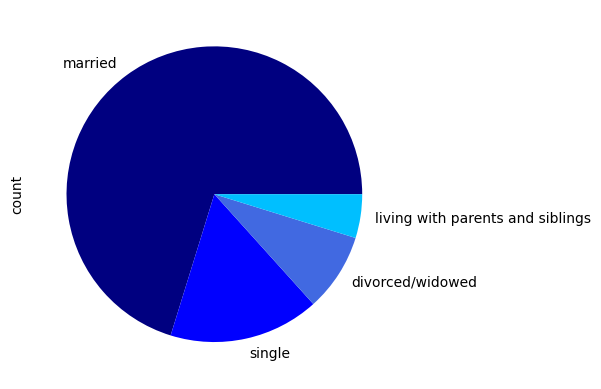

In [63]:
# Create pie chart for family status
colors = ['navy','blue','royalblue','deepskyblue']
pie_family = df_ordprodcust_exclusion['fam_status'].value_counts().plot.pie(colors = colors)

In [64]:
# Export created chart
pie_family.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'family_pie.png'),bbox_inches='tight')

In [67]:
#Count frequency of family status
df_ordprodcust_exclusion['fam_status'].value_counts()

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

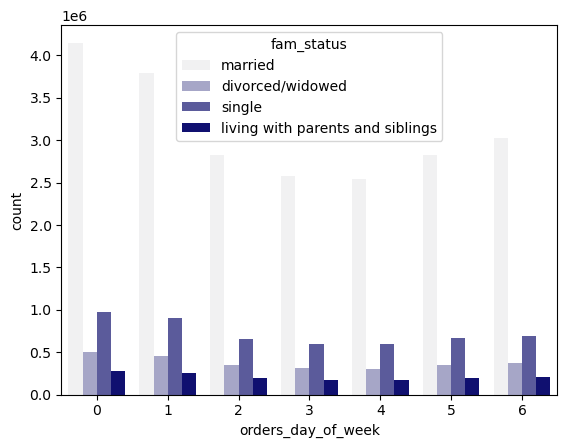

In [69]:
# Create bar chart for family status and order counts per day of week
fam_dow=sns.countplot(x='orders_day_of_week', hue='fam_status', data=df_ordprodcust_exclusion, color = 'navy')

In [70]:
# Export created chart
fam_dow.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'family_dow.png'),bbox_inches='tight')

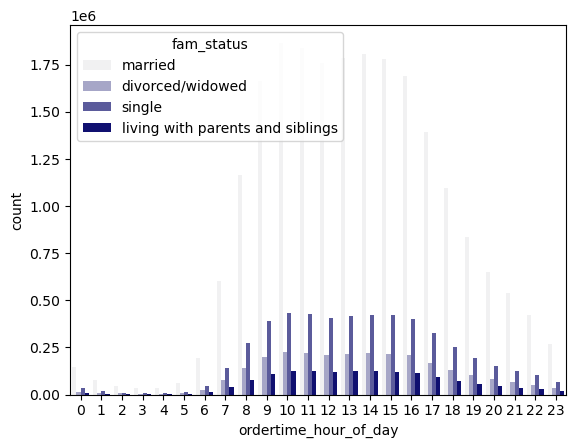

In [71]:
# Create bar chart for family status and order counts per hod
fam_hod=sns.countplot(x='ordertime_hour_of_day', hue='fam_status', data=df_ordprodcust_exclusion, color = 'navy') 

In [72]:
# Export created chart
fam_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'family_hod.png'),bbox_inches='tight')

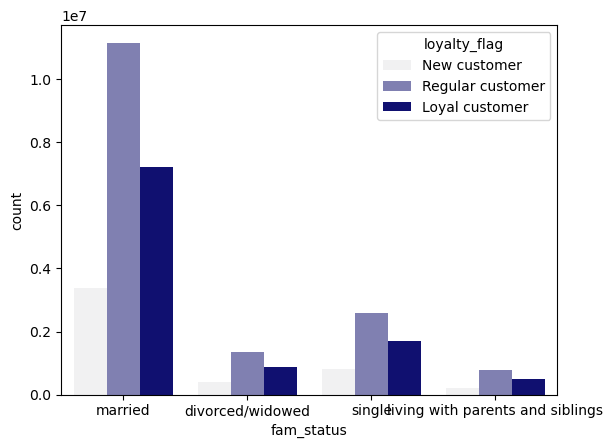

In [75]:
# Create bar chart for family status and loyalty groups 
fam_loyalty=sns.countplot(x='fam_status', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [76]:
# Export created chart
fam_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'family_loyalty.png'),bbox_inches='tight')

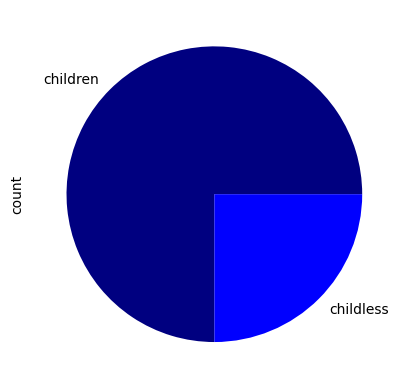

In [65]:
# Create pie chart for children_flag
colors = ['navy','blue']
pie_children = df_ordprodcust_exclusion['children_flag'].value_counts().plot.pie(colors = colors)

In [66]:
# Export created chart
pie_children.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'children_pie.png'),bbox_inches='tight')

In [68]:
#Count frequency of child_flag
df_ordprodcust_exclusion['children_flag'].value_counts()

children_flag
children     23224883
childless     7739681
Name: count, dtype: int64

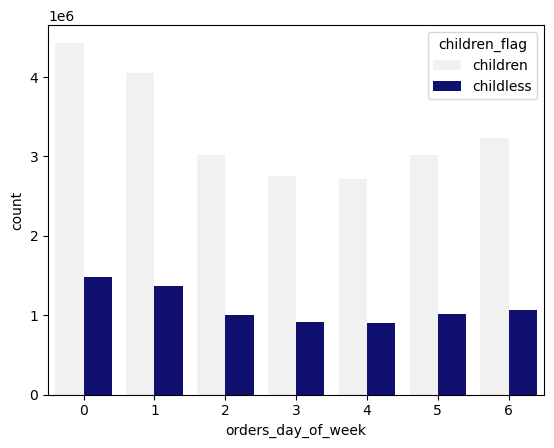

In [77]:
# Create bar chart for child status and order counts per day of week
child_dow=sns.countplot(x='orders_day_of_week', hue='children_flag', data=df_ordprodcust_exclusion, color = 'navy')

In [78]:
# Export created chart
child_dow.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'children_dow.png'),bbox_inches='tight')

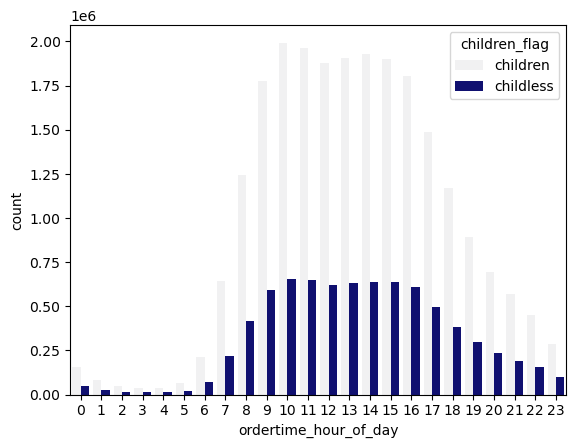

In [79]:
# Create bar chart for child status and order counts per hod
child_hod=sns.countplot(x='ordertime_hour_of_day', hue='children_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [80]:
# Export created chart
child_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'children_hod.png'),bbox_inches='tight')

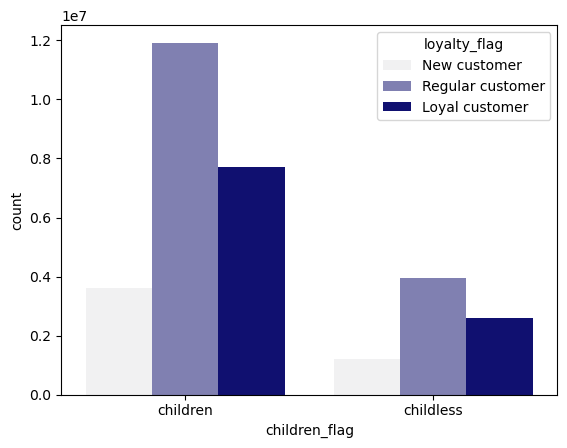

In [81]:
# Create bar chart for child status and loyalty groups 
child_loyalty=sns.countplot(x='children_flag', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [82]:
# Export created chart
child_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'children_loyalty.png'),bbox_inches='tight')

In [150]:
# Creating frequency table of spender types and age groups
age_spender = pd.crosstab(df_ordprodcust_exclusion['age_group'], df_ordprodcust['spending_flag']) 

In [152]:
# Copying frequency table 
age_spender.to_clipboard()

In [153]:
# Creating frequency table of spender types and family status
fam_spender = pd.crosstab(df_ordprodcust_exclusion['fam_status'], df_ordprodcust['spending_flag']) 

In [154]:
fam_spender.to_clipboard()

In [156]:
# Creating frequency table of spender types and child status
child_spender = pd.crosstab(df_ordprodcust_exclusion['children_flag'], df_ordprodcust['spending_flag']) 

In [157]:
child_spender.to_clipboard()

# Customer Analysis - Income

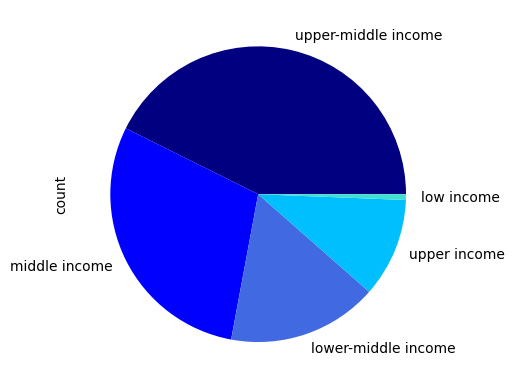

In [87]:
# Create pie chart for income groups
colors = ['navy','blue','royalblue','deepskyblue','turquoise']
pie_income = df_ordprodcust_exclusion['income_group'].value_counts().plot.pie(colors = colors)

In [88]:
# Export created chart
pie_income.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'income_pie.png'),bbox_inches='tight')

In [90]:
#Count frequency of income groups
df_ordprodcust_exclusion['income_group'].value_counts()

income_group
upper-middle income    13206444
middle income           9109710
lower-middle income     5092881
upper income            3361397
low income               194132
Name: count, dtype: int64

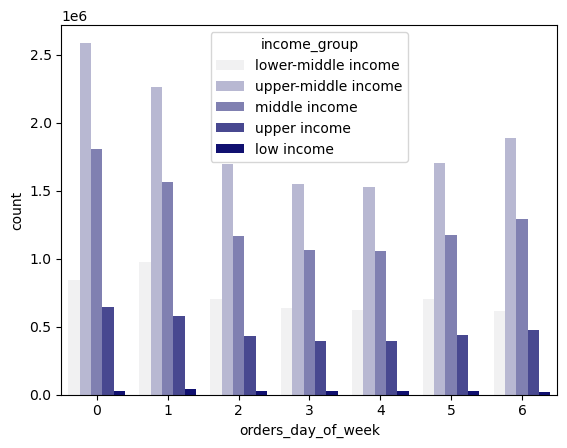

In [91]:
# Create bar chart for income group and order counts per day of week
income_dow=sns.countplot(x='orders_day_of_week', hue='income_group', data=df_ordprodcust_exclusion, color = 'navy')

In [92]:
# Export created chart
income_dow.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'income_dow.png'),bbox_inches='tight')

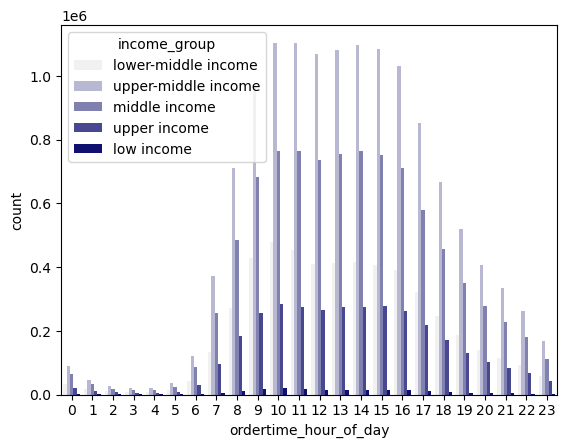

In [93]:
# Create bar chart for income groups and order counts per hod
income_hod=sns.countplot(x='ordertime_hour_of_day', hue='income_group', data=df_ordprodcust_exclusion, color = 'navy') 

In [94]:
# Export created chart
income_hod.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'income_hod.png'),bbox_inches='tight')

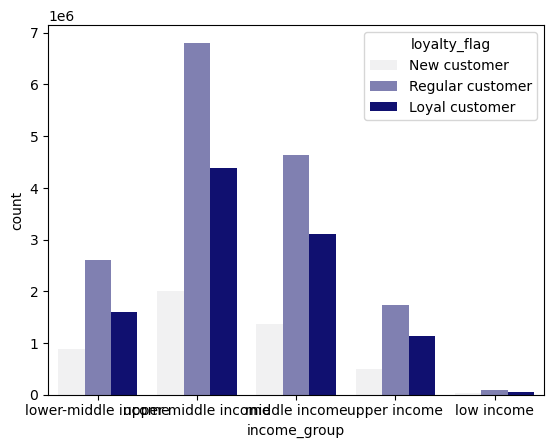

In [95]:
# Create bar chart for income group and loyalty groups 
income_loyalty=sns.countplot(x='income_group', hue='loyalty_flag', data=df_ordprodcust_exclusion, color = 'navy') 

In [96]:
# Export created chart
income_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'income_loyalty.png'),bbox_inches='tight')

# Product Analysis

In [98]:
# Create a new column to include department name
df_ordprodcust.loc[df_ordprodcust['department_id'] == 1,'department_name'] = 'frozen'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 2,'department_name'] = 'other'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 3,'department_name'] = 'bakery'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 4,'department_name'] = 'produce'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 5,'department_name'] = 'alcohol'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 6,'department_name'] = 'international'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 7,'department_name'] = 'beverages'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 8,'department_name'] = 'pets'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 9,'department_name'] = 'dry goods pasta'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 10,'department_name'] = 'bulk'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 11,'department_name'] = 'personal care'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 12,'department_name'] = 'meat seafood'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 13,'department_name'] = 'pantry'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 14,'department_name'] = 'breakfast'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 15,'department_name'] = 'canned goods'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 16,'department_name'] = 'dairy eggs'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 17,'department_name'] = 'household'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 18,'department_name'] = 'babies'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 19,'department_name'] = 'snacks'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 20,'department_name'] = 'deli'
df_ordprodcust.loc[df_ordprodcust['department_id'] == 21,'department_name'] = 'missing'

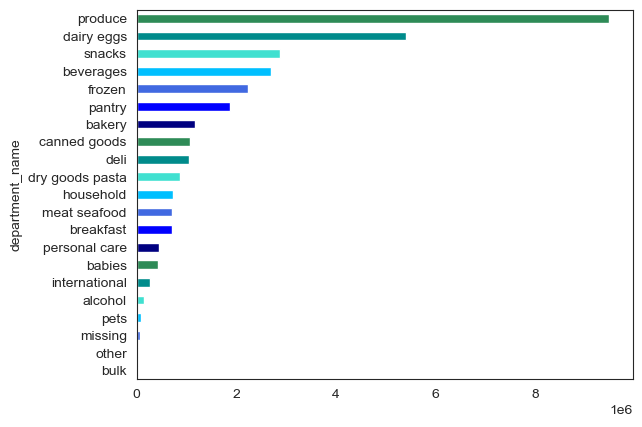

In [31]:
# Create bar chart department popularity
sns.set_style(style='white') 
department_bar = df_ordprodcust['department_name'].value_counts().sort_values().plot.barh(color = ['navy','blue','royalblue','deepskyblue', 'turquoise', 'darkcyan', 'seagreen']) 

In [112]:
# Export created bar chart
department_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_departments.png'),bbox_inches='tight')

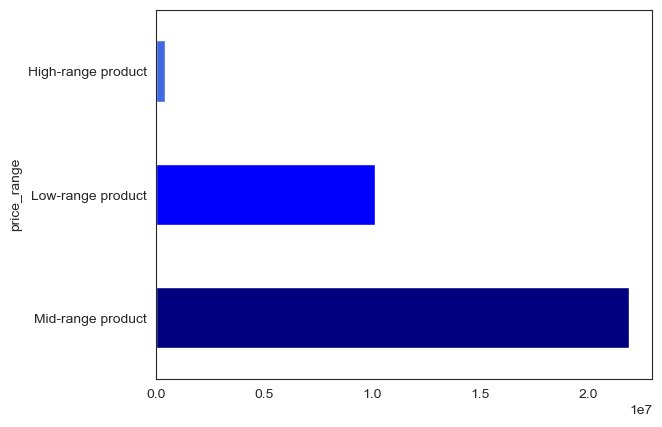

In [33]:
# Create bar chart product price ranges
sns.set_style(style='white') 
priceranges_bar = df_ordprodcust['price_range'].value_counts().plot.barh(color = ['navy','blue','royalblue'])

In [107]:
# Export created bar chart
priceranges_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_priceranges.png'),bbox_inches='tight')

In [34]:
#find top 10 products
top_10 = (df_ordprodcust['product_name'].value_counts()).iloc[:10]

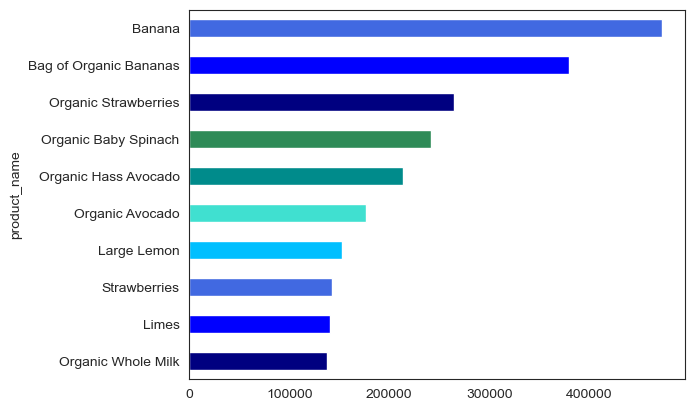

In [35]:
#create bar chart to visualize top 10 products
top10 = top_10.sort_values().plot(kind='barh', color = ['navy','blue','royalblue','deepskyblue', 'turquoise', 'darkcyan', 'seagreen'])

In [134]:
# Export created bar chart
top10.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'top_products.png'),bbox_inches='tight')

In [131]:
# Grouping dataframe by departments and aggregating data with mean, median, min, max of prices
df_ordprodcust_exclusion.groupby('age_group').agg({'income': ['mean','min','max']})

income               
                           mean    min     max
age_group                                     
middle age adult  113798.264879  26154  592409
senior adult      115971.684913  29001  593901
teenager           70263.259946  25972  396364
young adult        70679.006756  25903  397929

# Other Analysis - Frequencies

In [134]:
#Count frequency of day of week
df_ordprodcust['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [135]:
#Count frequency of hour of day
df_ordprodcust['ordertime_hour_of_day'].value_counts()

ordertime_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [137]:
#Count frequency of hour of day
df_ordprodcust['price_range'].value_counts()

price_range
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

In [158]:
# Creating frequency table of spender types and income
income_spender = pd.crosstab(df_ordprodcust_exclusion['income_group'], df_ordprodcust['spending_flag']) 

In [159]:
# Copying to clipboard
income_spender.to_clipboard()